## Introduktion

 
Inom AI-utveckling handlar allt i grund och botten om att hitta minsta värden för vissa funktioner. 

För det ändamålet gick vi under senaste lektionen igenom den metod som används, för i princip all moden AI-utveckling, för att göra detta: **Gradient Descent**.

Syftet med följande uppgifter är att vi ska få en lite bättre känsla för hur Gradient Descent fungerar


_____

**Vad är Gradient Descent?**

Gradient Descent är en optimeringsmetod som används för att minimera en funktion genom att iterativt justera parametrarna. 

Den grundläggande idén är att vi vid varje iteration beräknar gradienten (derivatan) av funktionen, som visar oss vilken riktning vi ska röra vår oberoende variabel i, för att minska funktionsvärdet. 

I funktionen ovan är x vår oberoende variablen, och Vi uppdaterar vårt x-värde enligt följande formel:

$$
x_{\text{ny}} = x_{\text{gammal}} - \text{learning rate} \times \text{gradient}
$$
Genom att justera learning rate kan vi styra hur stora steg vi tar mot minimum.


_____

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Vi definierar först här en funktion som vi vill hitta minimum till. Specifikt vill vi hitta det x-värde som ger funktionens minsta värde. Vi definierar även funktionens derivata - den behövs för Gradient Descent.


In [ ]:
def f(x):
    return x**2 - 4*x + 4

def f_derivative(x):
    return 2*x - 4


### Visualisering av Funktionen

Innan vi kör Gradient Descent, låt oss visualisera funktionen *f* för att se var minimum ligger.


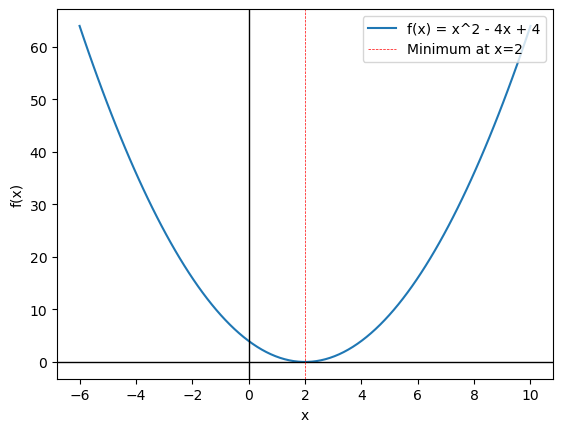

In [35]:
# Visualize the function
x_values = np.linspace(-6, 10, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x) = x^2 - 4x + 4')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.axvline(2, color='red', lw=0.5, ls='--', label='Minimum at x=2')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper right')
plt.show()


Vi ser här direkt via plotten att funktionen en har ett minimum vid x=2. Nu ska vi försöka hitta detta minimum automatiskt med hjälp av Gradient Descent.

_____

Låt oss nu definiera funktionen som utför Gradient Descent, vilket interativt hittar oss fram till det x-värde som ger oss minsta funktionsvärdet.

In [55]:
def gradient_descent(f, f_derivative, initial_x, learning_rate=0.1, iterations=1000):

    x = initial_x   # startvärdet av x
    x_values = []   # lista att samla alla värden av x

    for i in range(iterations):
        
        x_values.append(x)
        
        gradient = f_derivative(x)
        
        x = x - learning_rate * gradient

    # ------------ notera att följande endast är kod för som hanterar plotten, ej nödvändig för själva gradient descent ------------
        plt.figure(figsize=(10, 6))
        x_plot = np.linspace(np.abs(initial_x)+1, -np.abs(initial_x)-1, 100)
        plt.plot(x_plot, f(x_plot), label='f(x) = x^2 - 4x + 4', color='blue')
        plt.axhline(0, color='black', lw=1)
        plt.axvline(0, color='black', lw=1)
        #plt.axvline(2, color='red', lw=0.5, ls='--', label='Minimum at x=2')

        # plot all previous x values
        plt.scatter(x_values, f(np.array(x_values)), color='orange', label='Previous x values')
        # Plot the current x value
        plt.scatter(x, f(x), color='green', label='Current x value', s=100)
        
        plt.title(f'Gradient Descent Iteration {i + 1}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()
    # ------------------------------------------------------------------------------------------------------------------------------

        if abs(gradient) < 0.005:   # bryt om ändringen i gradienten är mindre än ett visst tröskelvärde
            break
        
        print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}, gradient = {gradient}")
    
    return x

_____

**Problem 1**

Testa att köra funktionen *gradient_descent()* med olika värden på på *initial_x*. Börja med x=6 och testa sedan fler värden, både positiva och negativa.

Vad händer? Varför?

In [ ]:
gradient_descent(f, f_derivative, initial_x= 6)

**Problem 2**

Vi kan ge funktionen ytterligare en input, learning rate. I klassen gick vi igenom att learning rate är "hur mycket" vi backar i gradientens riktning (dvs, hur snabbt vi närmare oss det optimala värdet av x) vid varje iteration. 

Välj återigen x=6 som startgissning, och testa därefter att köra igenom funktionen för följande värden på learning rate: 

[0.1, 0.01, 0,001]

Vad händer? Hur många iterationen krävs i varje fall för att slutföra funktionen?

Tips: du kan manuellt avbryta funktionen om det tar för lång tid...


In [ ]:
gradient_descent(f, f_derivative, learning_rate=0.1, initial_x=6)

**Problem 3**


Vi har i uppgiften ovan testat vad som händer om man har relativt små värden på learning rate. Nu ska vi testa motsatsen, dvs lite större värden på learning rate.

Kör funktionen igen, men x=6 som startgissning, men denna gång testa följande learning rates:

[0.8, 1, 1.2]

Vad händer? 

Återigen, du kan manuellt abryta funktionen om det tar för lång tid...

In [ ]:
gradient_descent(f, f_derivative, learning_rate=0.8, initial_x=6)

**Problem 4**

Testa runt för fler värden på learning rate. 

Blir det som du förväntar dig?

Vad kan du dra för slutsatser av problem 1-3?

**Problem 5**

Plotta nu funktionen $f(x) = x^4 - 6x^2 + 4x + 12$. 

Hur ser den ut, generellt?

Vad tror du händer om vi hade försökt köra Gradient Descent på funktionen du plottade ovan? Vad förutser du?

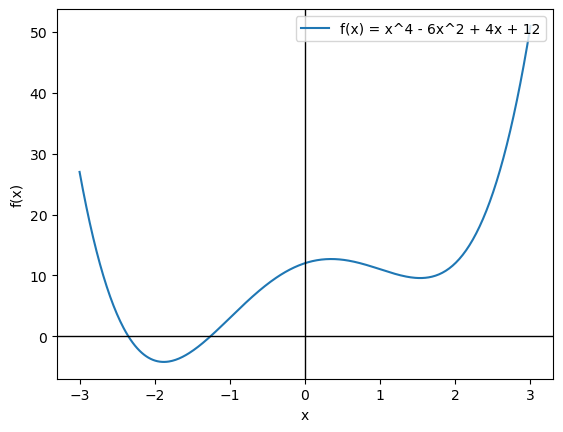

In [62]:
def f2(x):
    return x**4 - 6*x**2 + 4*x + 12
x_values = np.linspace(-3, 3, 400)
y_values = f2(x_values)

plt.plot(x_values, y_values, label='f(x) = x^4 - 6x^2 + 4x + 12')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
#plt.axvline(2, color='red', lw=0.5, ls='--', label='Minimum at x=2')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper right')
plt.show()

In [53]:
def f_derivative2(x):
    return 4*x**3 - 12*x + 4

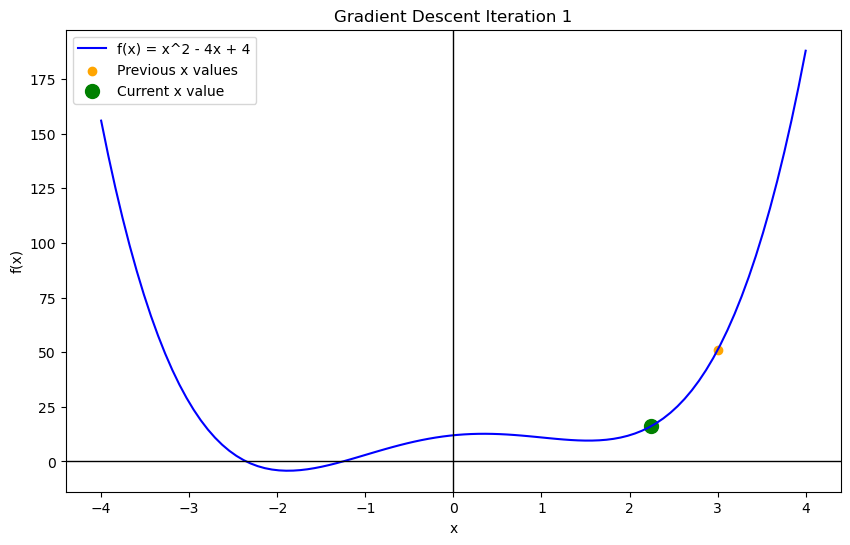

Iteration 1: x = 2.24, f(x) = 16.030709760000008, gradient = 76


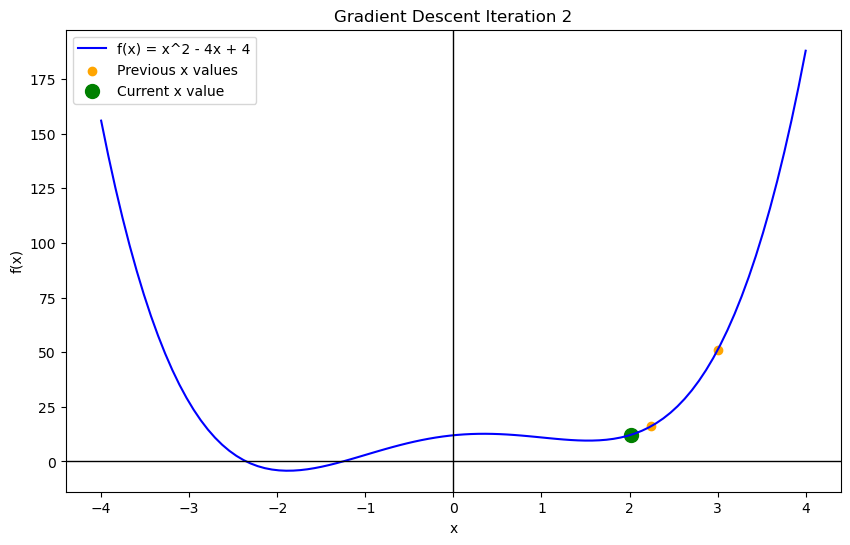

Iteration 2: x = 2.01922304, f(x) = 12.237384898543954, gradient = 22.07769600000001


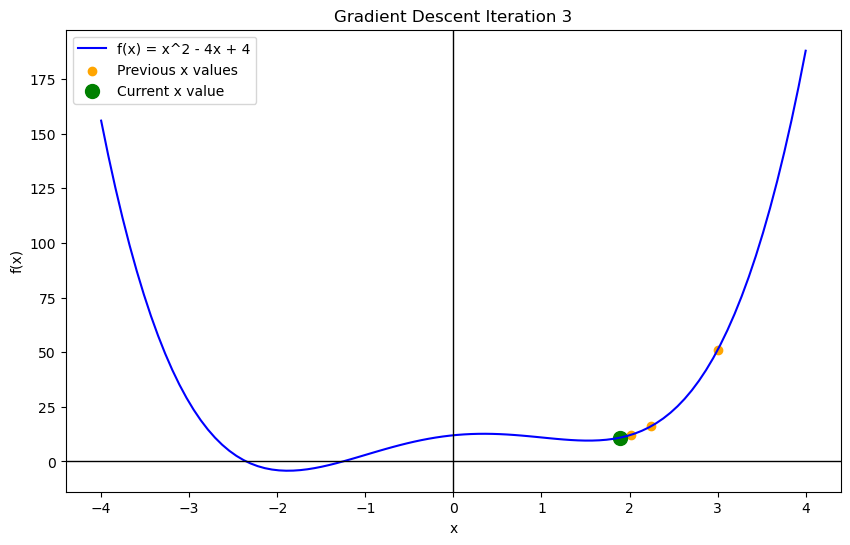

Iteration 3: x = 1.8922137753999986, f(x) = 10.905803972606012, gradient = 12.70092646000014


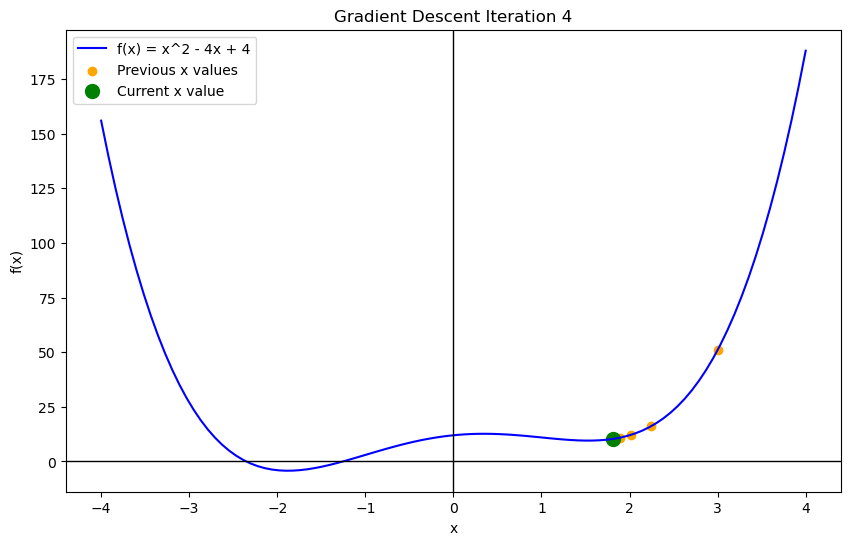

Iteration 4: x = 1.8082786172594822, f(x) = 10.305945126659816, gradient = 8.393515814051643


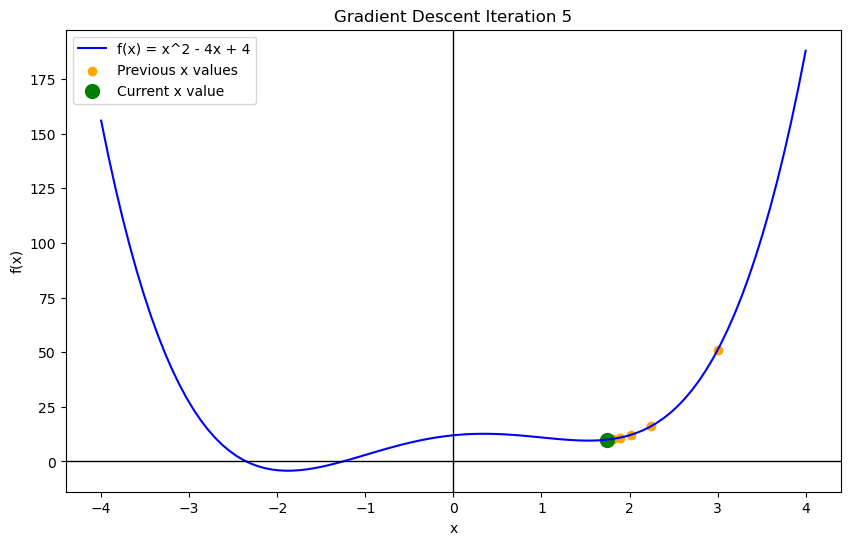

Iteration 5: x = 1.7487584985761597, f(x) = 9.998416147945772, gradient = 5.952011868332246


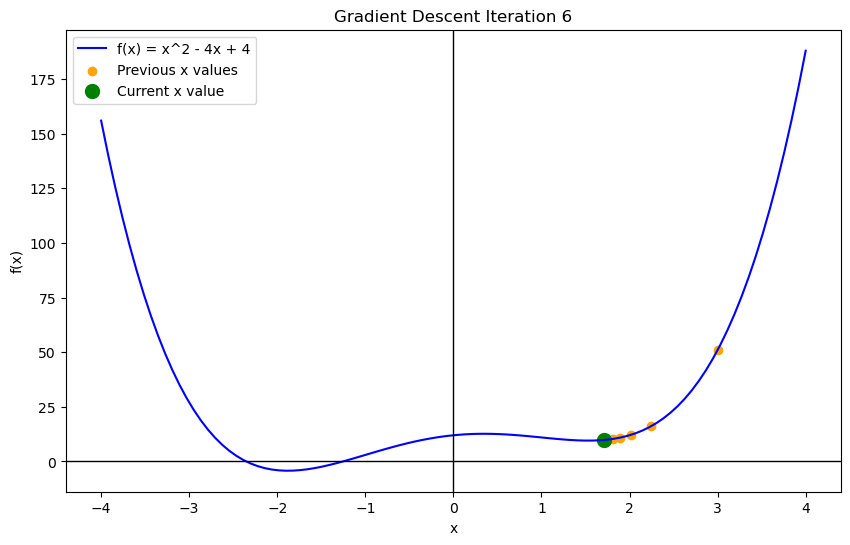

Iteration 6: x = 1.7046904465766877, f(x) = 9.827603517729695, gradient = 4.406805199947215


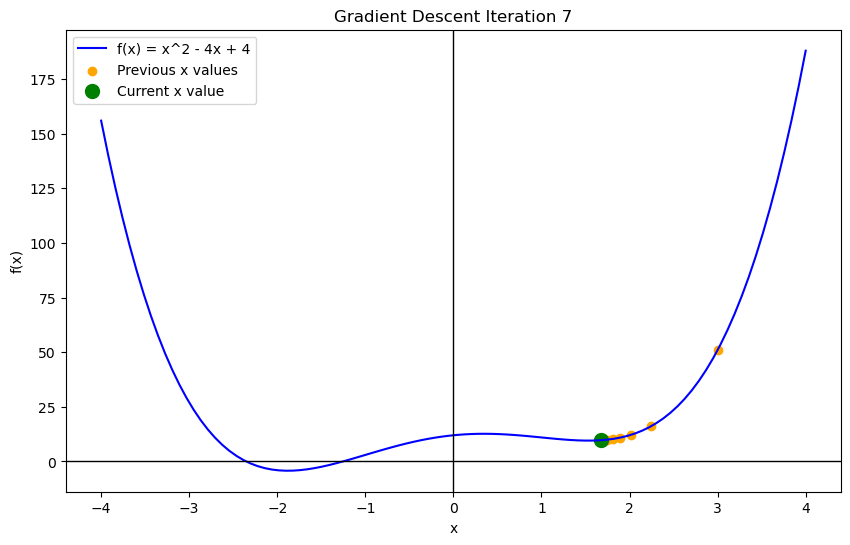

Iteration 7: x = 1.6711021611064736, f(x) = 9.72743069158636, gradient = 3.3588285470214103


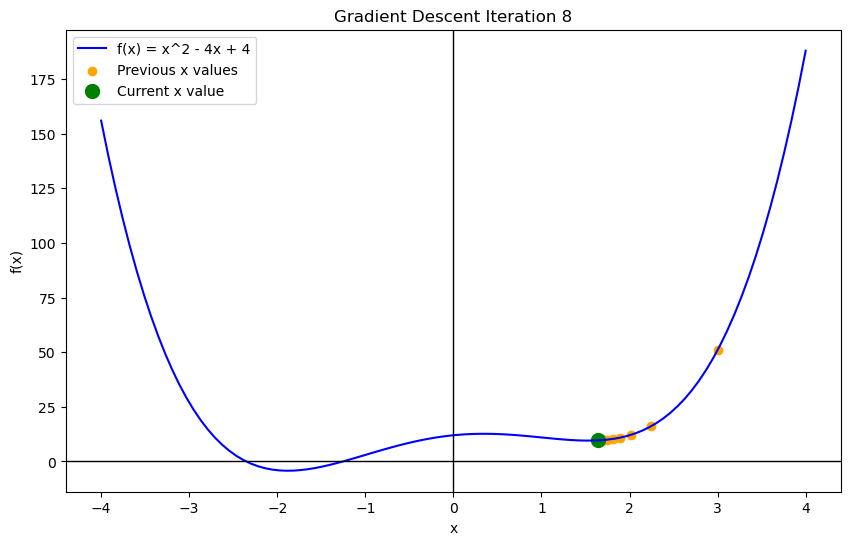

Iteration 8: x = 1.6449667988947902, f(x) = 9.666352730227832, gradient = 2.613536221168342


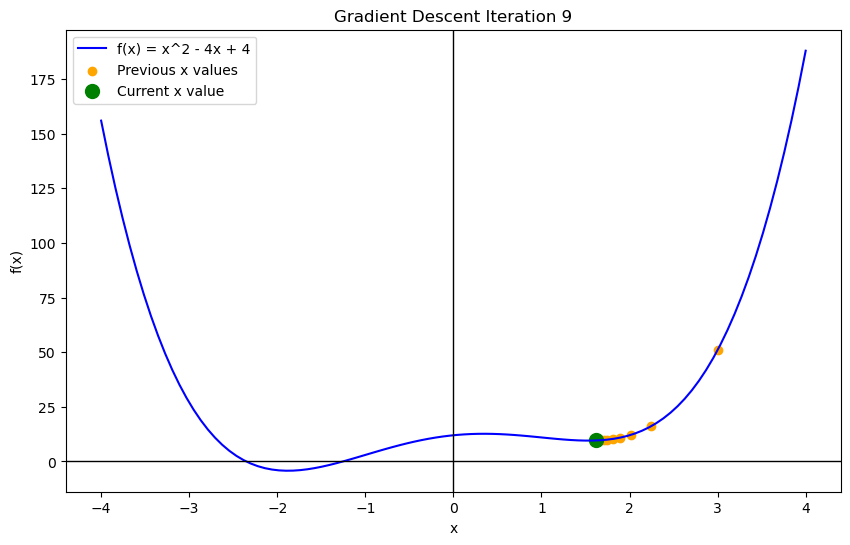

Iteration 9: x = 1.6243171507070568, f(x) = 9.628018674628898, gradient = 2.064964818773337


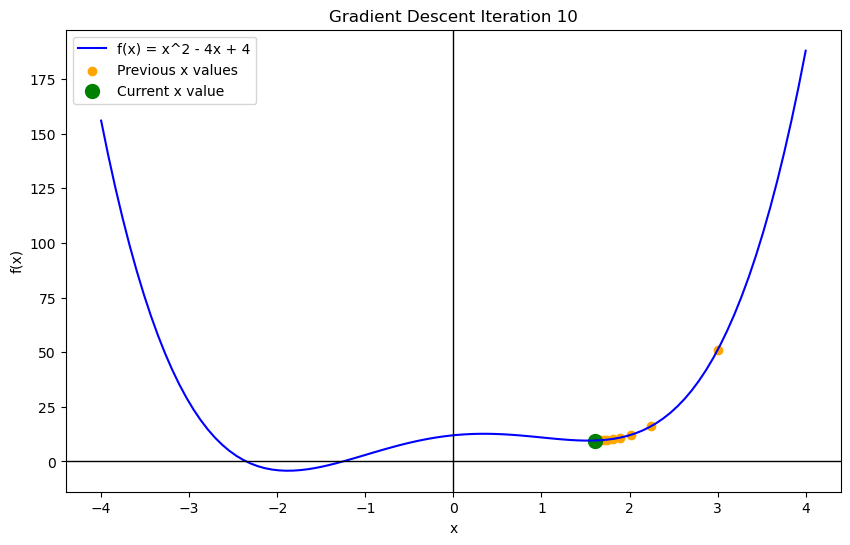

Iteration 10: x = 1.6078108707491254, f(x) = 9.603422175347484, gradient = 1.650627995793137


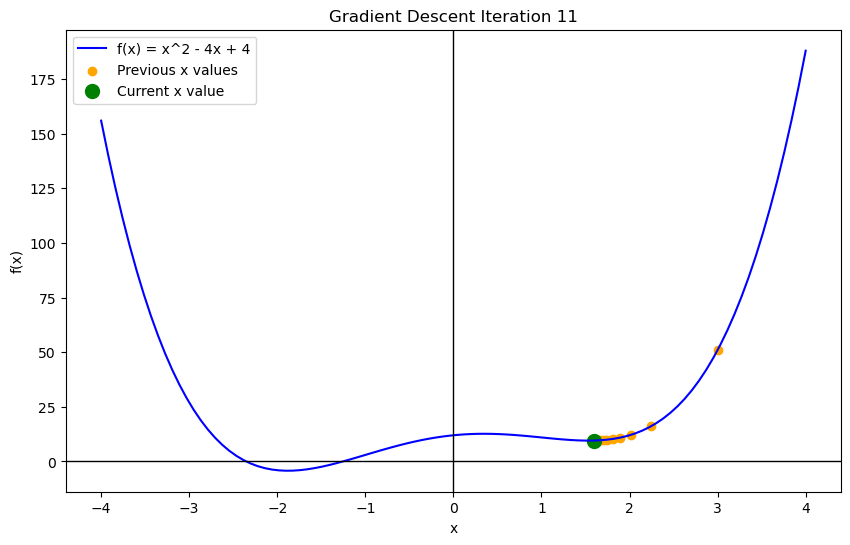

Iteration 11: x = 1.5944969428205762, f(x) = 9.587366769494741, gradient = 1.3313927928549134


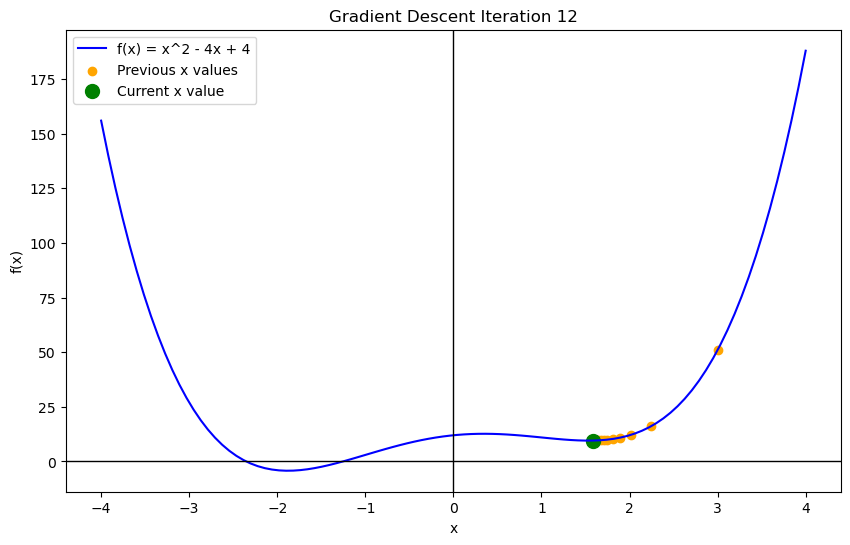

Iteration 12: x = 1.5836813073321105, f(x) = 9.576743492027077, gradient = 1.0815635488465603


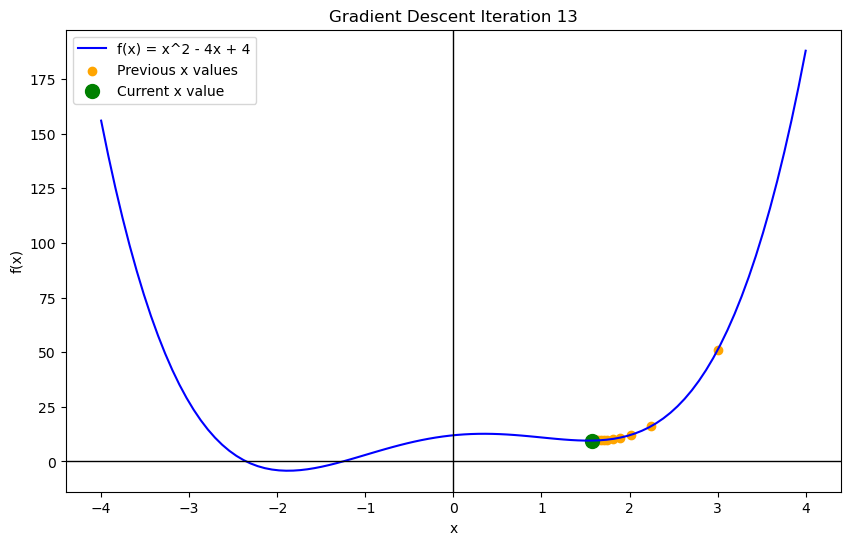

Iteration 13: x = 1.574845210877843, f(x) = 9.569637926646765, gradient = 0.8836096454267466


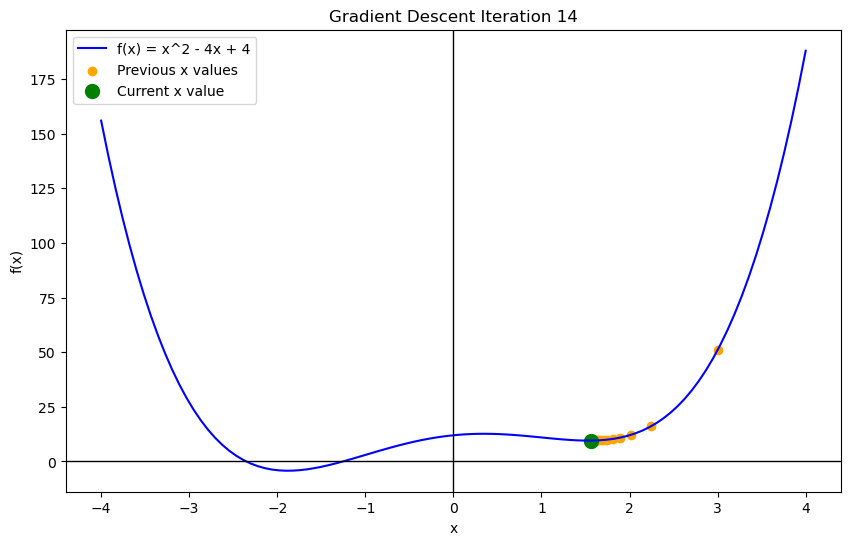

Iteration 14: x = 1.5675933335068926, f(x) = 9.564843594579148, gradient = 0.7251877370950481


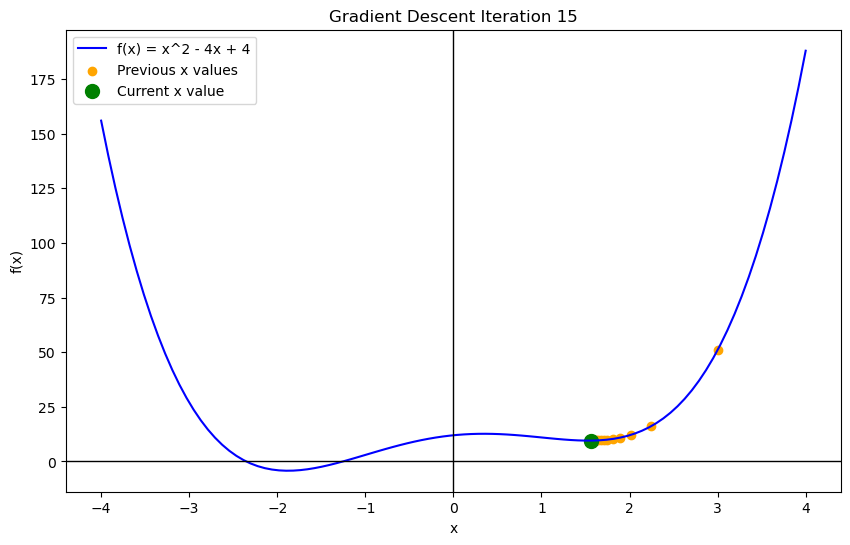

Iteration 15: x = 1.5616195859329476, f(x) = 9.561585731880761, gradient = 0.5973747573944888


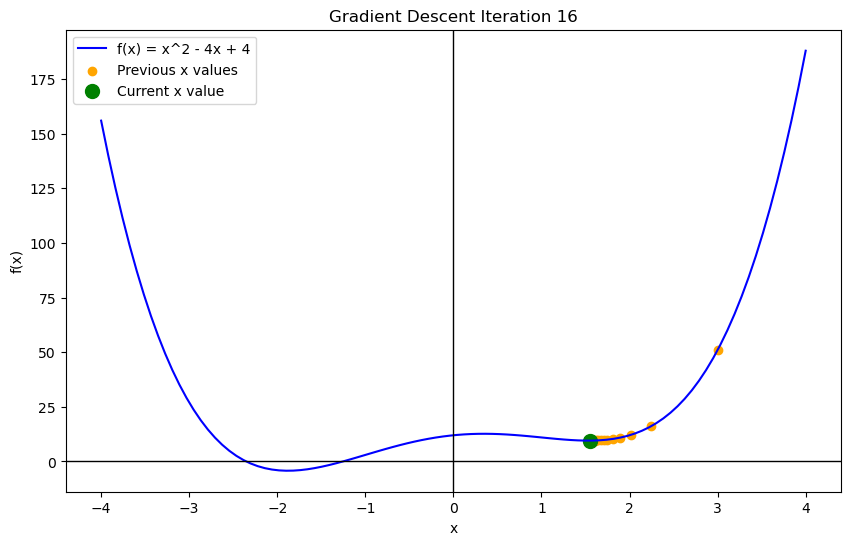

Iteration 16: x = 1.556683834119231, f(x) = 9.5593591049116, gradient = 0.4935751813716429


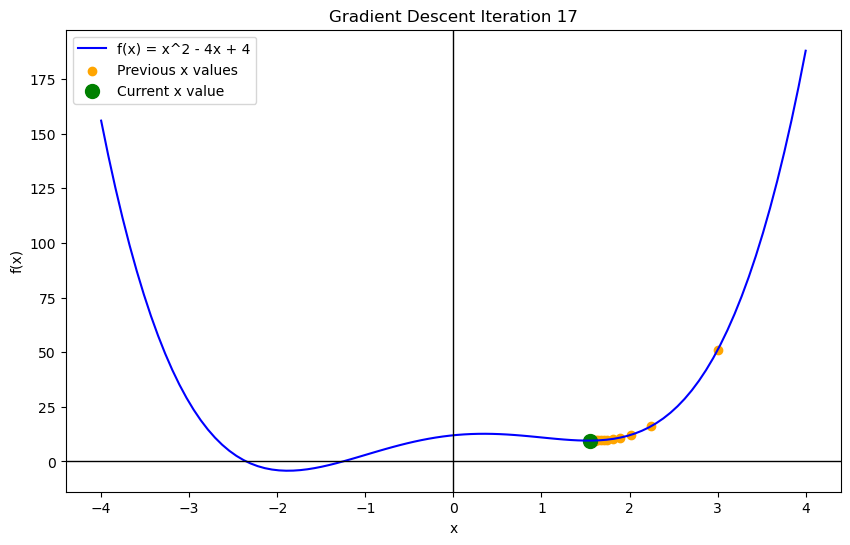

Iteration 17: x = 1.5525956235965497, f(x) = 9.557830059298535, gradient = 0.4088210522681379


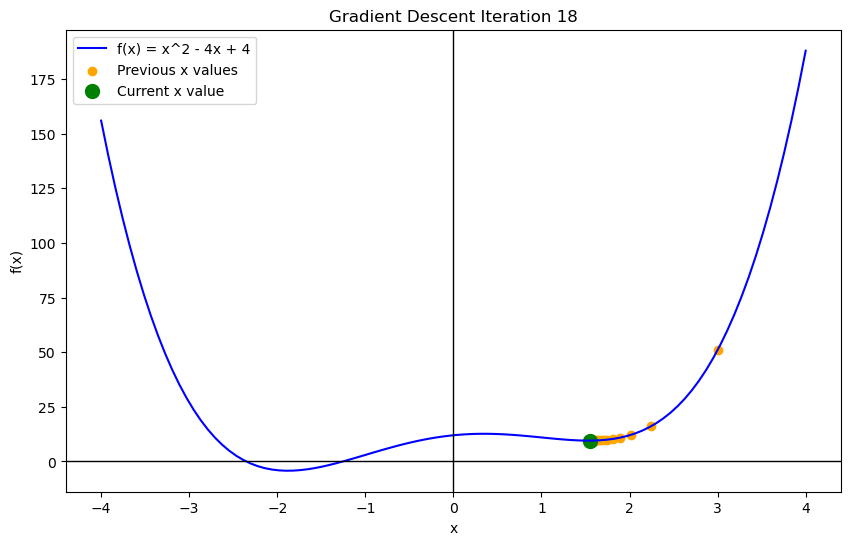

Iteration 18: x = 1.5492025263150495, f(x) = 9.556775945021482, gradient = 0.3393097281500168


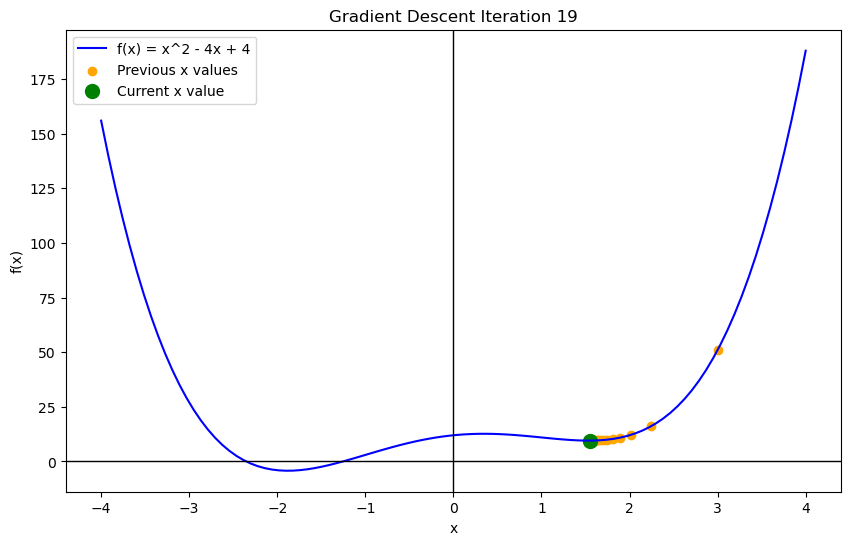

Iteration 19: x = 1.5463816228671576, f(x) = 9.556046900684523, gradient = 0.28209034478919826


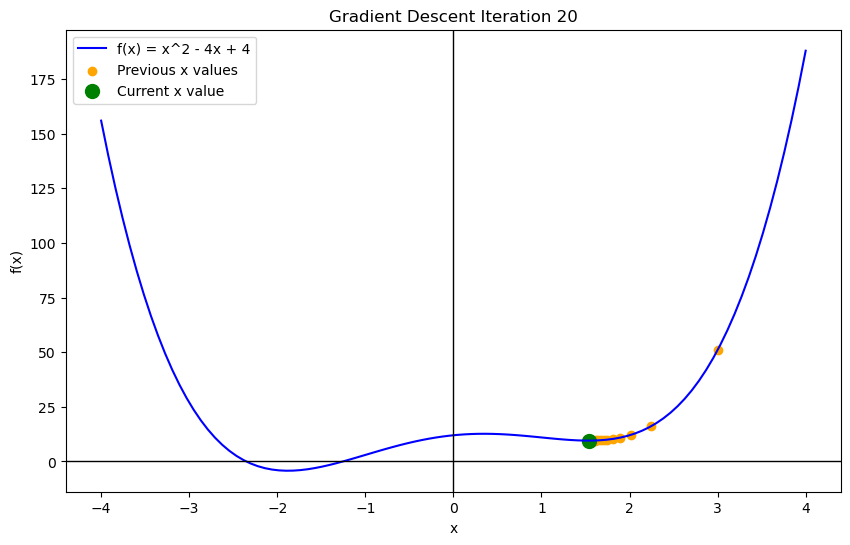

Iteration 20: x = 1.5440331624001093, f(x) = 9.555541334155045, gradient = 0.23484604670483833


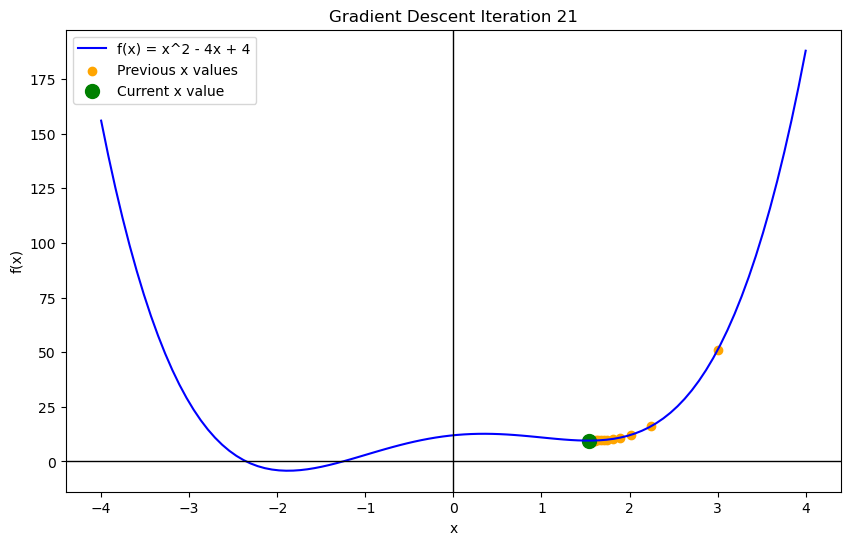

Iteration 21: x = 1.5420757674796242, f(x) = 9.555189965149964, gradient = 0.19573949204850827


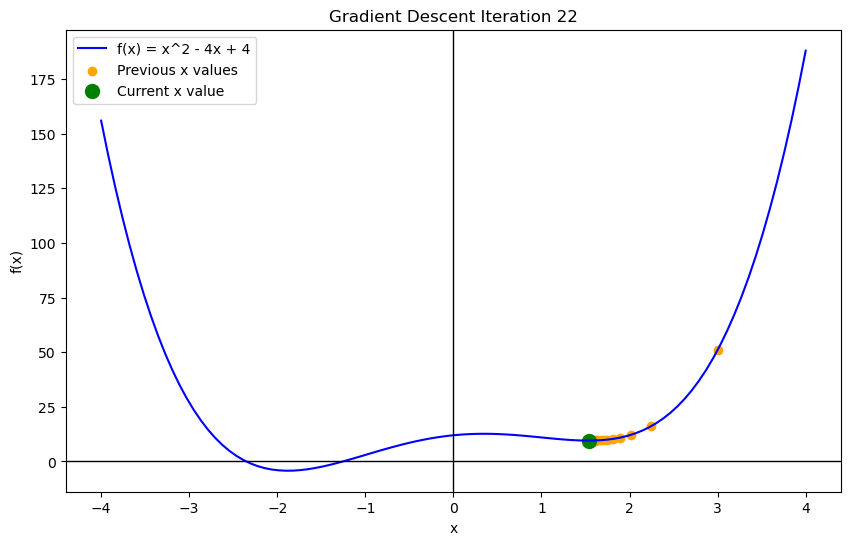

Iteration 22: x = 1.54044275613265, f(x) = 9.55494531414327, gradient = 0.16330113469742003


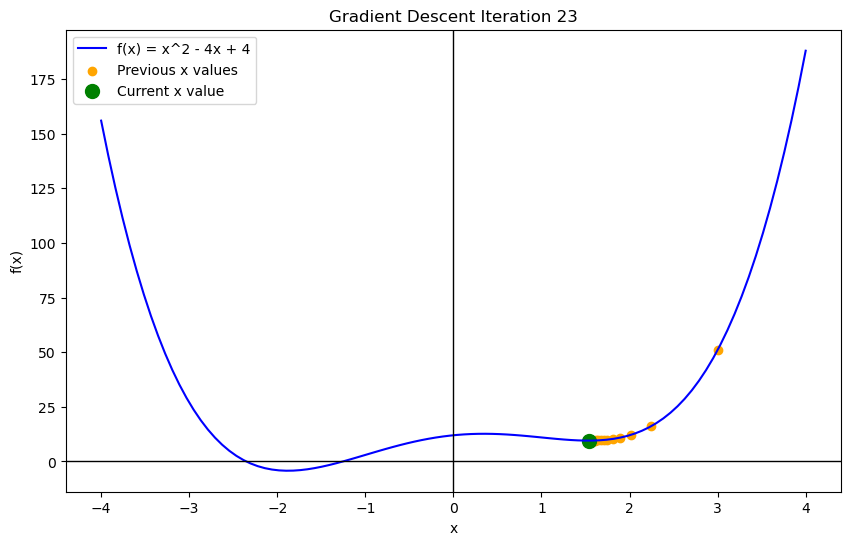

Iteration 23: x = 1.5390792857848958, f(x) = 9.55477470785169, gradient = 0.13634703477540278


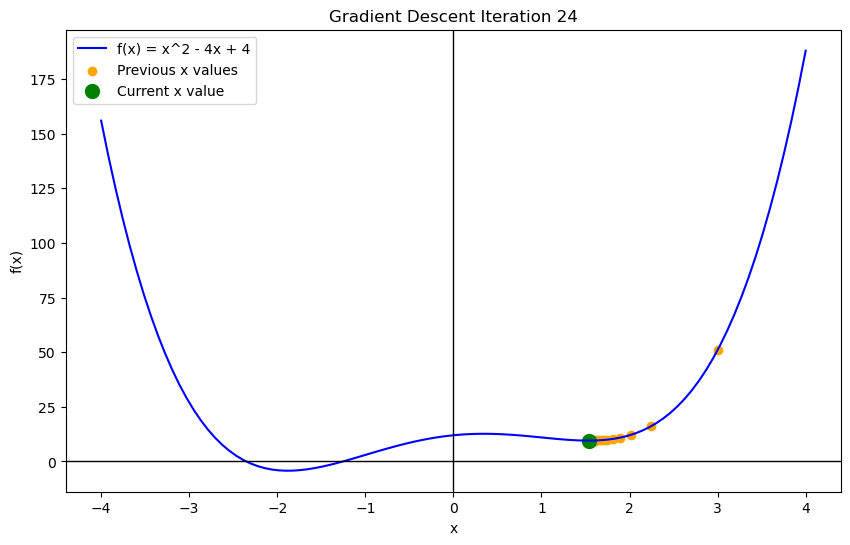

Iteration 24: x = 1.5379401113525382, f(x) = 9.55465558454301, gradient = 0.11391744323577058


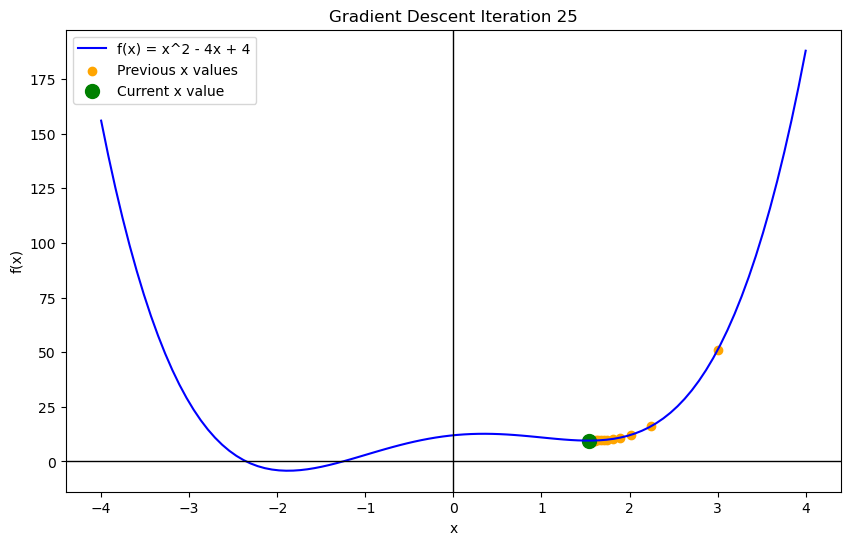

Iteration 25: x = 1.536987808761916, f(x) = 9.554572319971218, gradient = 0.09523025906221783


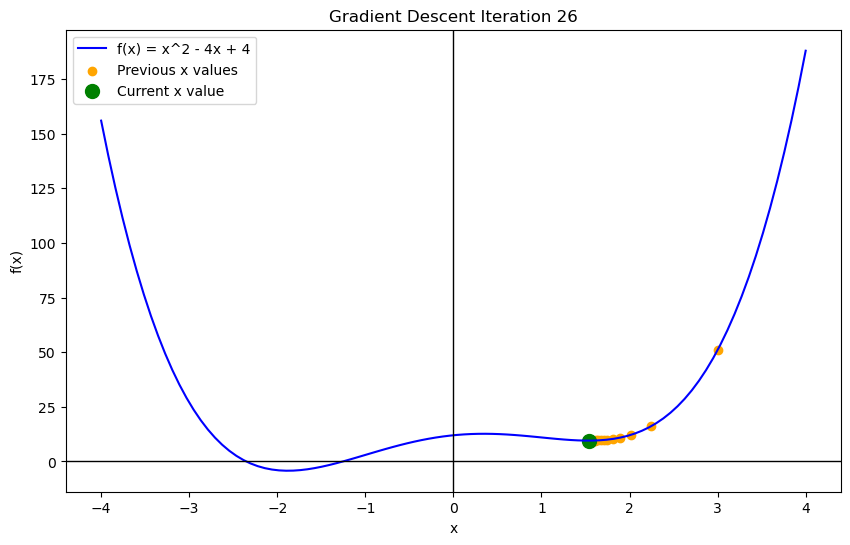

Iteration 26: x = 1.536191355690284, f(x) = 9.55451406818382, gradient = 0.07964530716320795


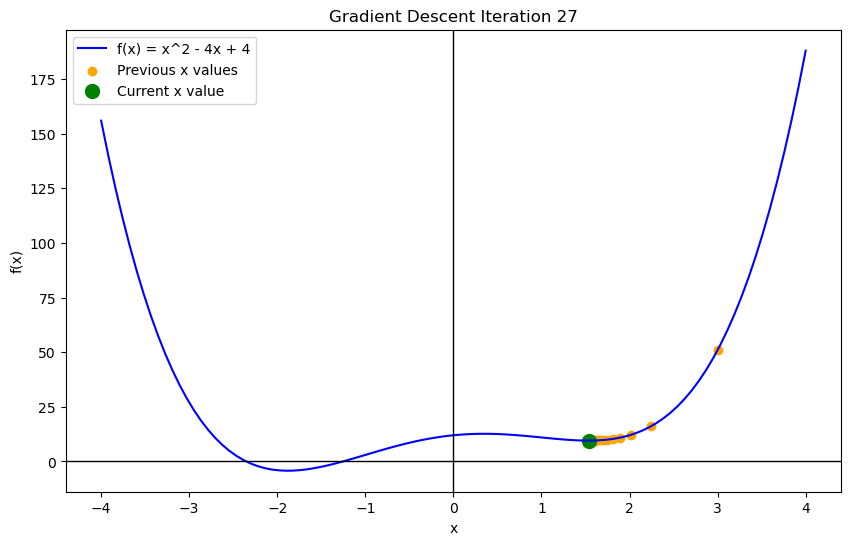

Iteration 27: x = 1.5355249896178327, f(x) = 9.554473285079126, gradient = 0.06663660724513853


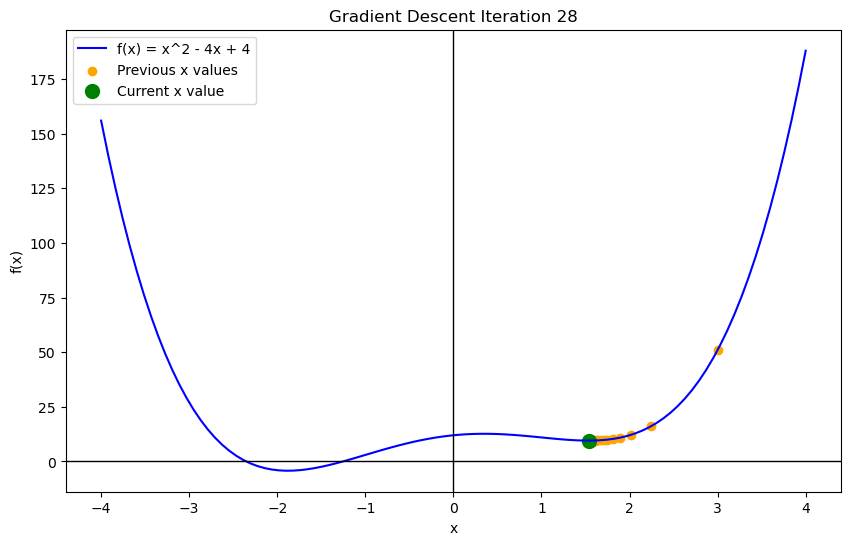

Iteration 28: x = 1.5349672833585946, f(x) = 9.55444471440595, gradient = 0.055770625923820205


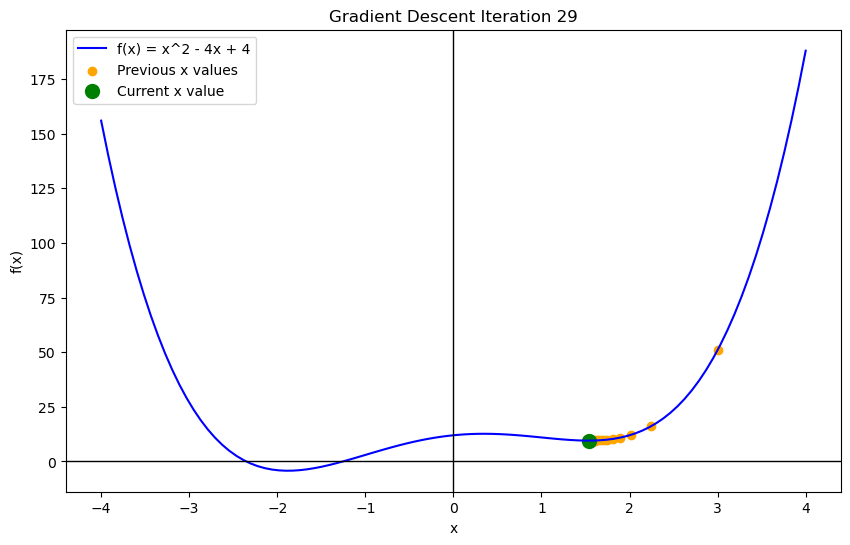

Iteration 29: x = 1.534500392696671, f(x) = 9.554424688796342, gradient = 0.0466890661923518


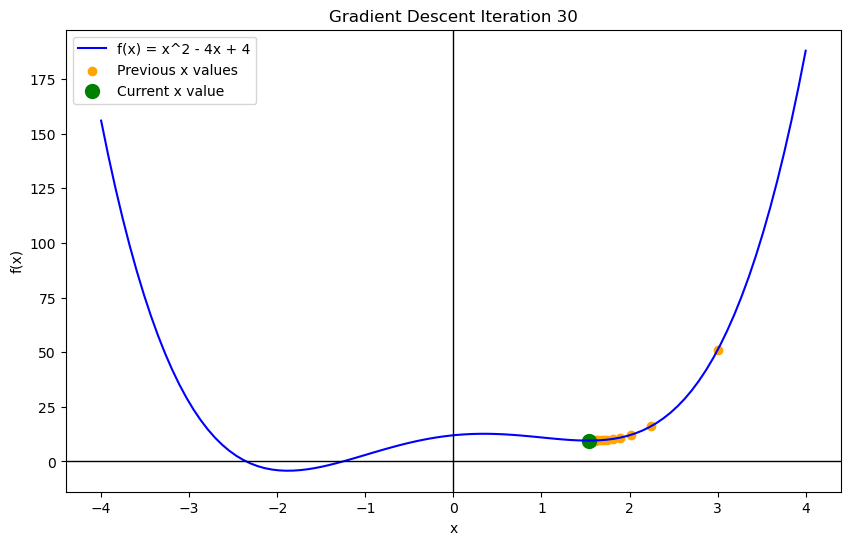

Iteration 30: x = 1.5341094413137604, f(x) = 9.554410646461719, gradient = 0.039095138291056486


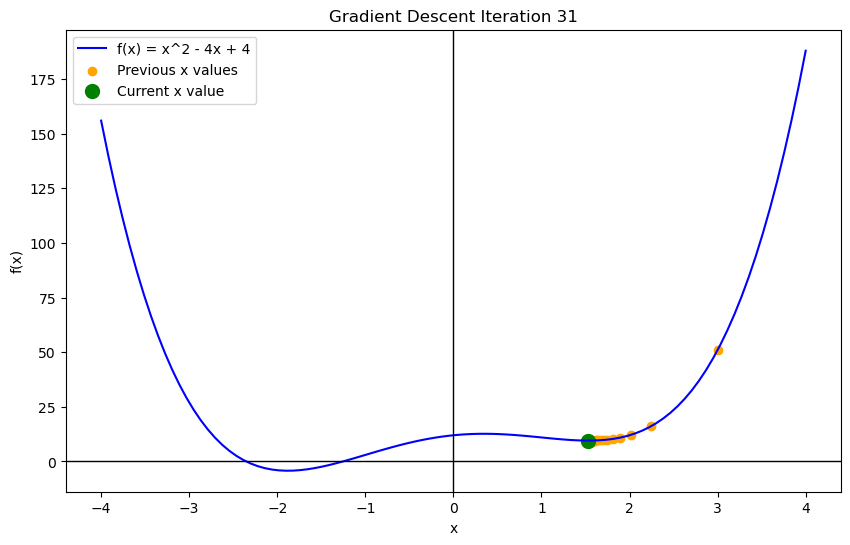

Iteration 31: x = 1.5337820160084643, f(x) = 9.554400796138713, gradient = 0.03274253052959786


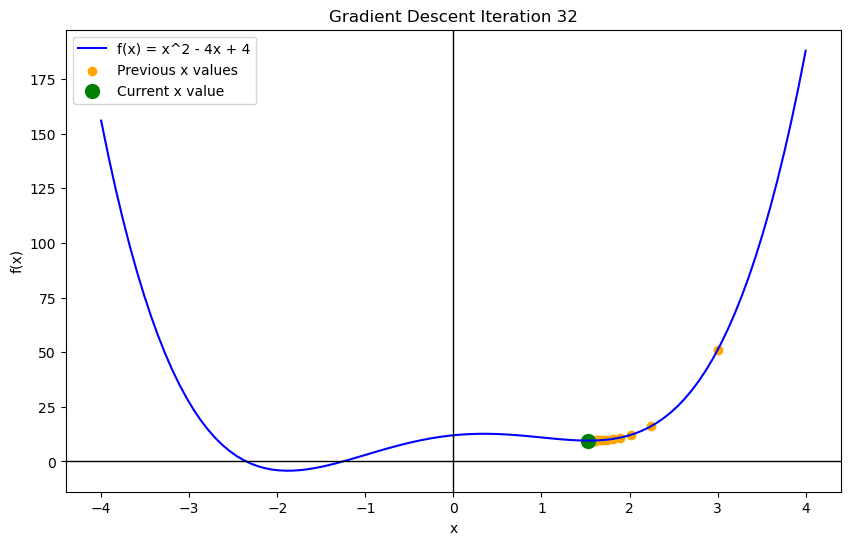

Iteration 32: x = 1.5335077510634716, f(x) = 9.554393884300922, gradient = 0.027426494499277254


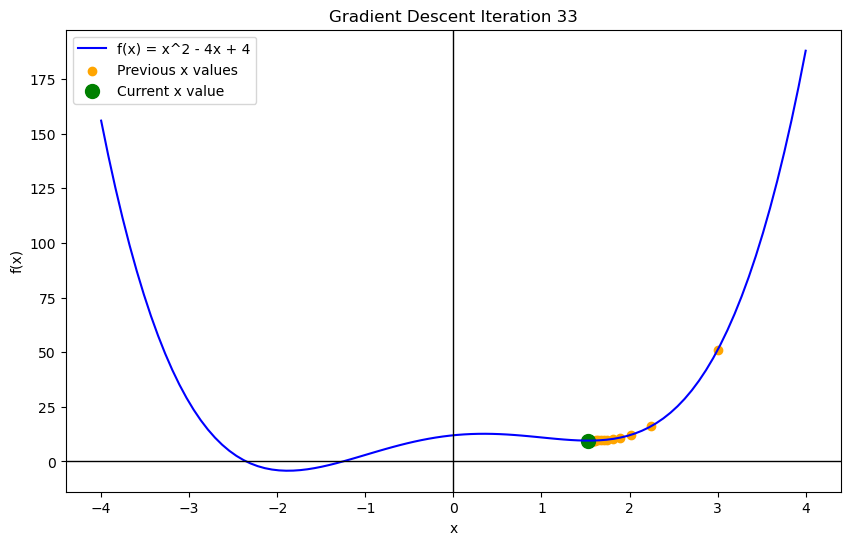

Iteration 33: x = 1.533277985056234, f(x) = 9.554389033124684, gradient = 0.022976600723765728


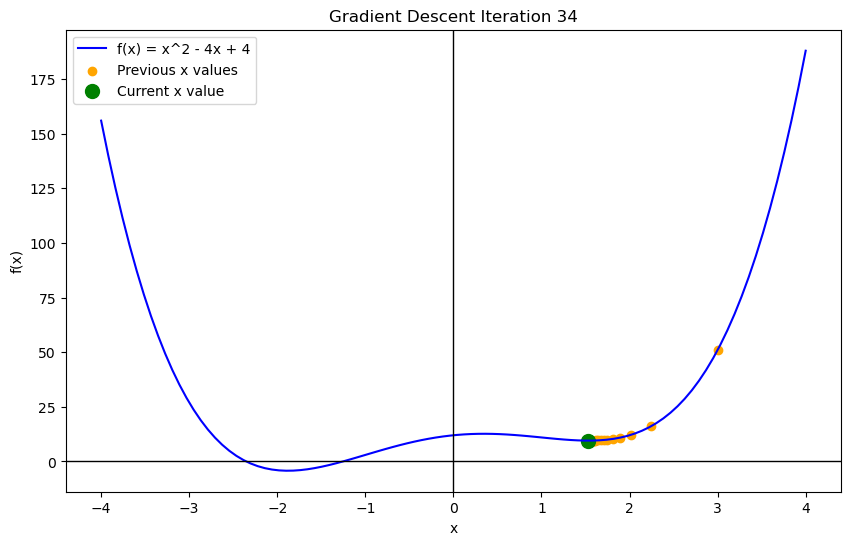

Iteration 34: x = 1.5330854768117481, f(x) = 9.554385627529168, gradient = 0.01925082444857651


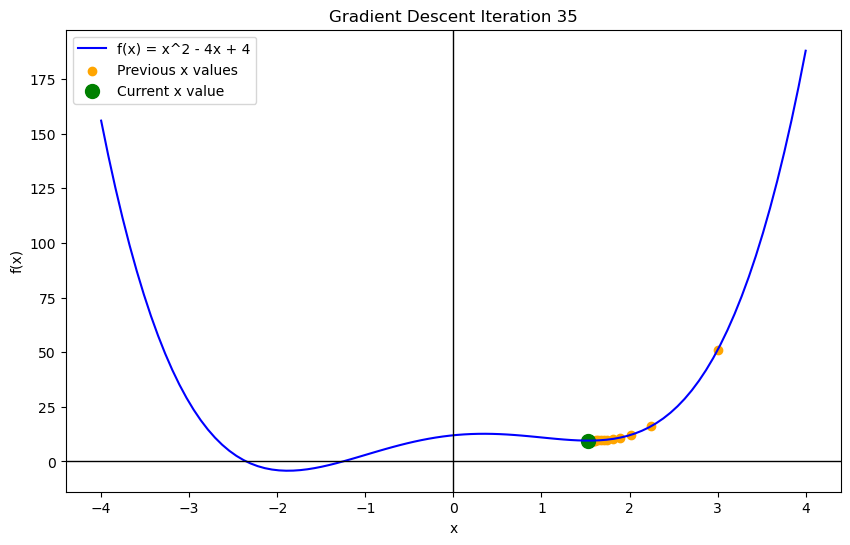

Iteration 35: x = 1.5329241698312632, f(x) = 9.554383236325576, gradient = 0.01613069804847811


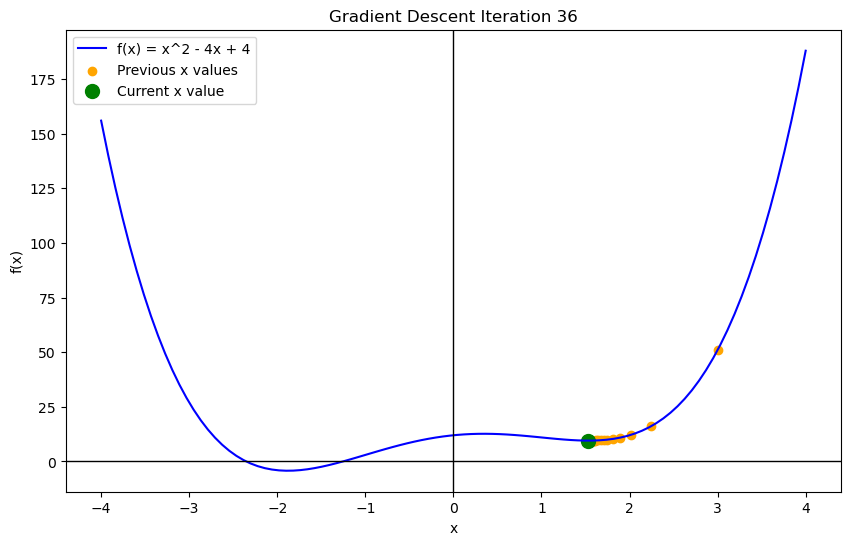

Iteration 36: x = 1.5327889965906727, f(x) = 9.554381557115823, gradient = 0.013517324059046487


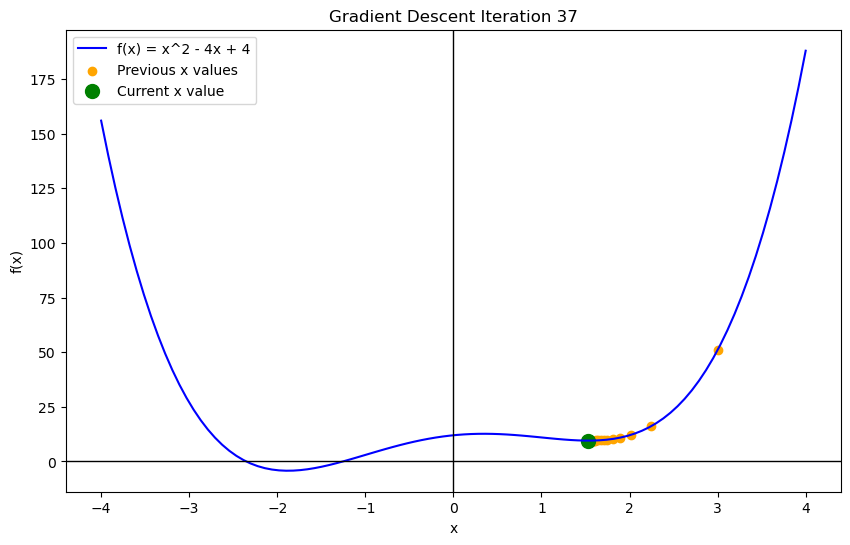

Iteration 37: x = 1.532675715726528, f(x) = 9.554380377752228, gradient = 0.011328086414463812


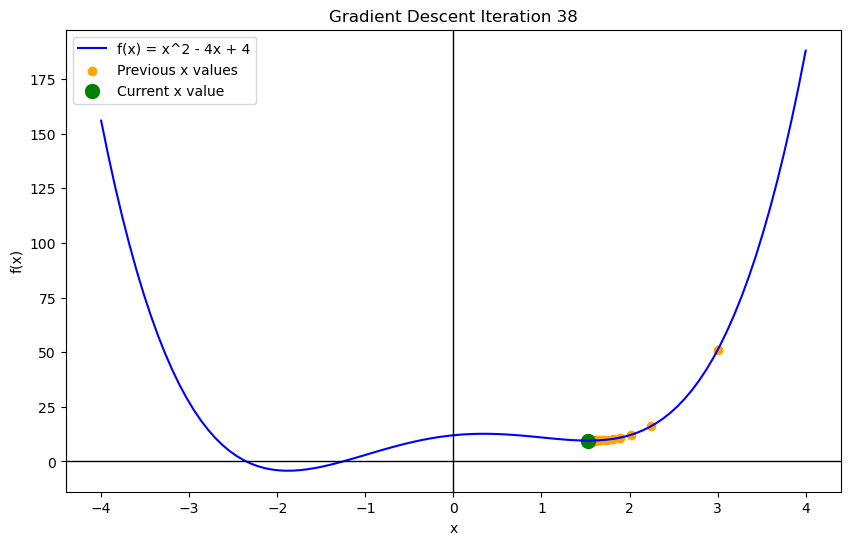

Iteration 38: x = 1.5325807764182637, f(x) = 9.554379549359929, gradient = 0.009493930826439012


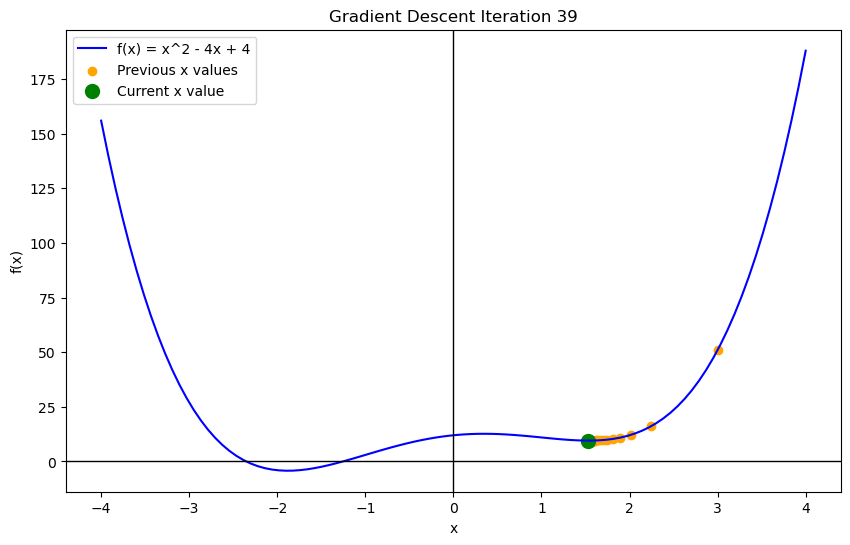

Iteration 39: x = 1.5325012053080822, f(x) = 9.55437896744089, gradient = 0.007957111018155771


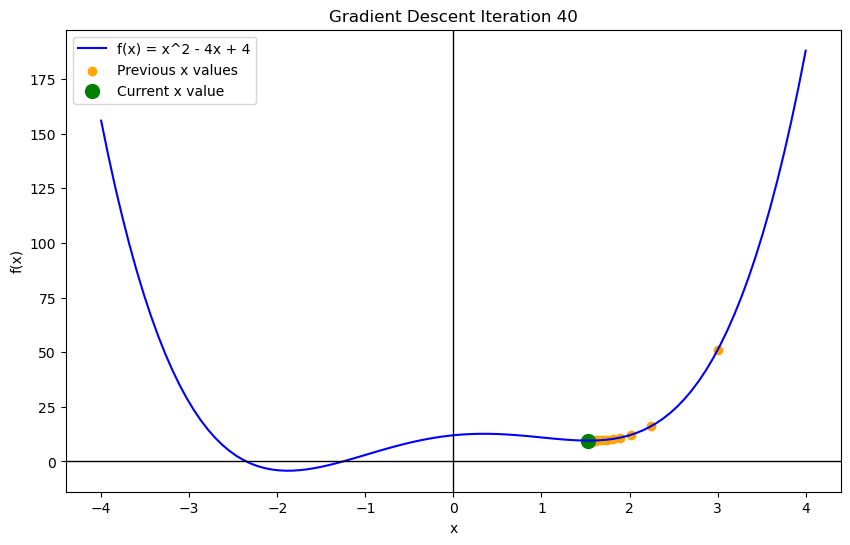

Iteration 40: x = 1.5324345121317253, f(x) = 9.554378558631297, gradient = 0.006669317635687122


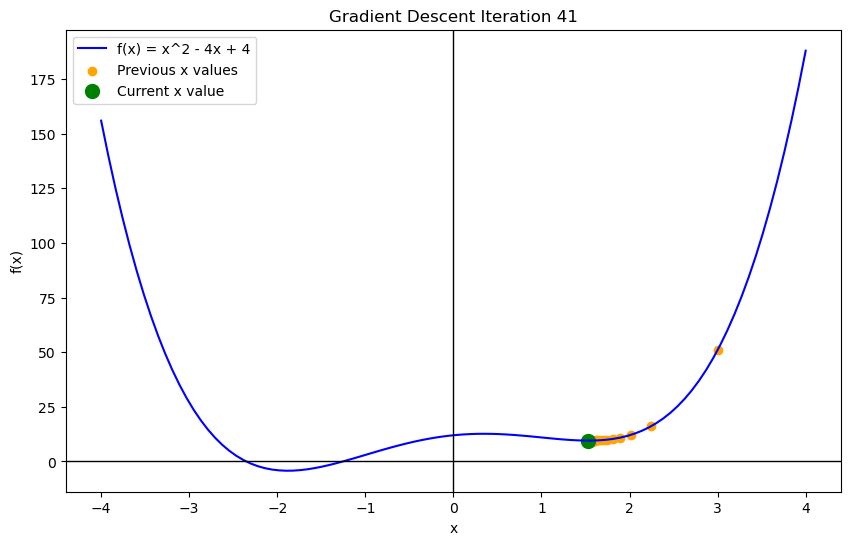

Iteration 41: x = 1.532378610906939, f(x) = 9.55437827141677, gradient = 0.005590122478620785


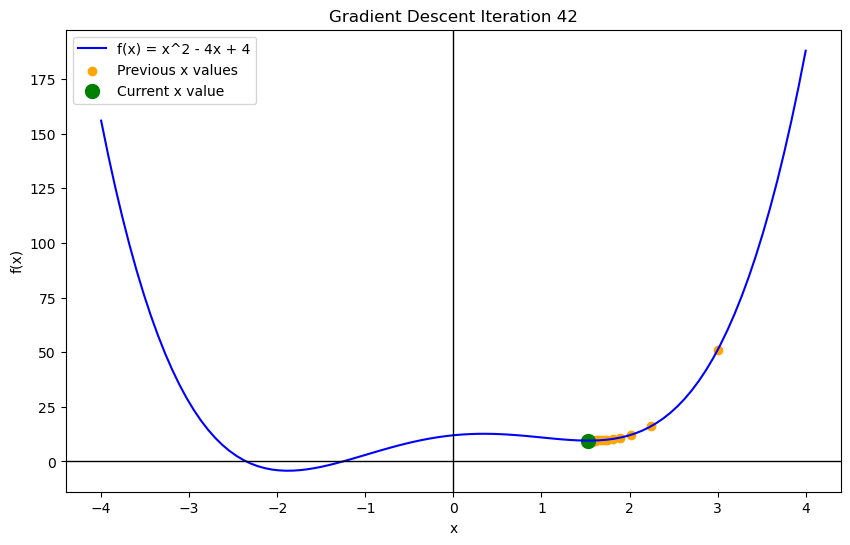

1.5323317540746022

In [63]:
gradient_descent(f2, f_derivative2, learning_rate=0.01, initial_x=3)

**Problem 6**

Anta att vi nu har

$f(x) = sin(2x) + x$ 

 - Kolla upp derivatan $f'(x)$ av denna funktion online (ex via wolframalpha.com) och skriv ner den. 
 - Skriv därefter ned iterationsformeln för x i gradient descent, med hjälp av derivatan.

Vad händer om vi skulle kört gradient descent på denna funktion? Förklara.

**Problem 7**

Ett problem för gradient descent ärdet s.k. problemet med globala- och lokala minimum. 

Hur stort problem är detta? Sök efter referenser på nätet (helst ej via språkmodeller) och förklara med egna ord vad detta innebär, hur det påverkar gradient gescent och hur man kan försöka kringgå det.